
L'idée va être de créer un indice de performance qui va nous permettre de
comparer les performances des différents joueurs de l'équipe. Pour cela, on va
utiliser les statistiques suivantes :
- le z-score de la vitesse maximale du joueur
- le z-score de la distance m/min du joueur
- le z-score du taux de présence du joueur
- le z-score de l'accélération du joueur

On va créer un dataframe avec une ligne par joueur et les colonnes suivantes :
- la vitesse maximale
- la distance m/min
- le taux de présence
- l'accélération

ainsi que leurs z-scores respectifs (et un z-score total ?)

In [431]:
## ------ Importing Libraries ------ ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors


In [432]:
match_played = pd.read_csv("/Users/cosaph/Desktop/fc servette/Coralie/Match_player/Export Servette Pro - all games.csv")
all_training = pd.read_csv("/Users/cosaph/Desktop/fc servette/Coralie/Export Servette Pro - all training.csv")

# créer un nouveau dataframe
df = pd.DataFrame()

# ajouter les colonnes nécessaires

# prendre le max et faire un groupby par joueur
df['Max_speed'] = match_played.groupby('PLAYER_NAME')['Vmax'].max()
df['Accélération max'] = match_played.groupby('PLAYER_NAME')['Accélération max'].max()


#df['Accélération max']

#print(df)

In [433]:
# je veux les distance m/Min ou le joueeur a joué plus de 60 minutes

matchs = match_played[match_played['DURATION'] > 60]

# maintenat je veux prendre le max de distance m/min pour chaque joueur

distance_mmin = matchs.groupby('PLAYER_NAME')['Distance m/min'].max()
#print(distance_mmin)

df['Distance_m/min'] = distance_mmin

J'ai 42 joueur dans l'équipe donc on va calculer le z-score avec toutes les valeurs qu'on a pour par exemple distance m/min et les mettre dans la lignes du joueur.

In [434]:

players = all_training['PLAYER_NAME'].unique()
nombre_train = all_training['DATE'].nunique()


# Boucle pour chaque joueur
for player in players:
    attendance_player = all_training[all_training['PLAYER_NAME'] == player]['ATTENDANCE'].value_counts()
    
    if isinstance(attendance_player, pd.Series):
        attendance_player = attendance_player.reindex(['PRESENT', 'ADAPTE', 'BLESSE', 'READAPTATION', 'REPOS', 'EN SOIN', 'MALADE', 'ABSENT'], fill_value=0)
    
    attendance_player_sum = attendance_player.sum()

    present_player = attendance_player['PRESENT']
    
    pourcentage_present = (present_player / attendance_player_sum) * 100 if attendance_player_sum > 0 else 0


    df.loc[player, 'Attendance'] = pourcentage_present
    
#print(df)
    
#save the csv 
    


In [435]:
# maintenant on va calculer un z-score pour chacune des variables
df['PLAYER_NAME'] = df.index
df['Max_speed_z'] = (df['Max_speed'] - df['Max_speed'].mean()) / df['Max_speed'].std()
df['Accélération max_z'] = (df['Accélération max'] - df['Accélération max'].mean()) / df['Accélération max'].std()
df['Distance_m/min_z'] = (df['Distance_m/min'] - df['Distance_m/min'].mean()) / df['Distance_m/min'].std()
df['Attendance_z'] = (df['Attendance'] - df['Attendance'].mean()) / df['Attendance'].std()


In [436]:
player = "L.Besson"
player_data = df.loc[player]
print(player_data)

Max_speed                   NaN
Accélération max            NaN
Distance_m/min              NaN
Attendance            70.520231
PLAYER_NAME            L.Besson
Max_speed_z                 NaN
Accélération max_z          NaN
Distance_m/min_z            NaN
Attendance_z          -0.055917
Name: L.Besson, dtype: object


In [437]:
acc_mean = df['Accélération max_z'].mean(skipna=True)
speed_mean = df['Max_speed_z'].mean(skipna=True)
distance_mean = df['Distance_m/min_z'].mean(skipna=True)
attendance_mean = df['Attendance_z'].mean(skipna=True)

print(acc_mean, speed_mean, distance_mean, attendance_mean)

0.0 -1.8914910789910075e-16 2.1239049166742126e-16 7.553481649681869e-16


In [438]:
# ne font plus partis de l'équipe

print(df.columns)

df = df.loc[~df['PLAYER_NAME'].isin(['N.Vouilloz', 'P.Pflücke', 'J.Onguene', 'B.Fofana', 'R.Rodelin'])]



Index(['Max_speed', 'Accélération max', 'Distance_m/min', 'Attendance',
       'PLAYER_NAME', 'Max_speed_z', 'Accélération max_z', 'Distance_m/min_z',
       'Attendance_z'],
      dtype='object')


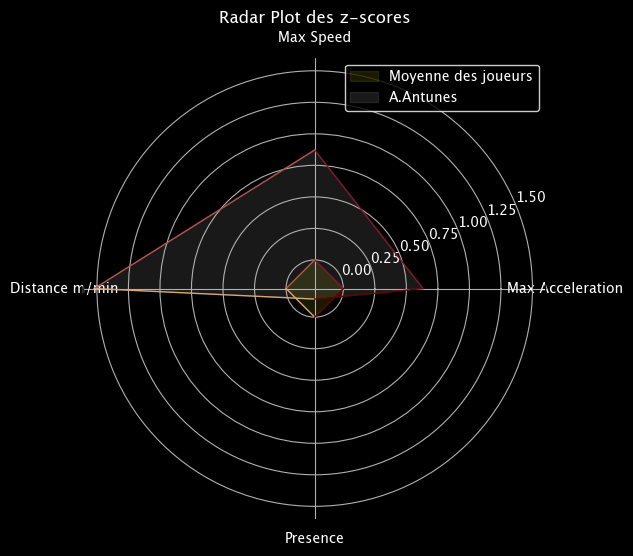

In [439]:
import matplotlib.pyplot as plt
from math import pi

# L'équipe
categories = ['Max Acceleration', 'Max Speed', 'Distance m/min', 'Presence']

values_mean = [acc_mean, speed_mean, distance_mean, attendance_mean]
values_mean += values_mean[:1] 

# Le joueur
player = "A.Antunes"
player_data = df.loc[player]
values_player = player_data[['Accélération max_z', 'Max_speed_z', 'Distance_m/min_z', 'Attendance_z']].values.flatten().tolist()
values_player += values_player[:1]

N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.xticks(angles[:-1], categories, color='white')

colors = ['#85142b','#b2544c','#dda56d','#660000']

for i in range(N):
    ax.plot(angles[i:i+2], values_mean[i:i+2], linewidth=1, linestyle='solid', color=colors[i])

ax.fill(angles, values_mean, color='yellow', alpha=0.1, label='Moyenne des joueurs')

for i in range(N):
    ax.plot(angles[i:i+2], values_player[i:i+2], linewidth=1, linestyle='solid', color=colors[i])

ax.fill(angles, values_player, color='white', alpha=0.1, label=player)

# Fait le fond du graphique en noir
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

# Paramètres pour que tous les textes soient en blanc
plt.rcParams.update({'text.color' : "white", 'axes.labelcolor' : "white", 'xtick.color' : "white", 'ytick.color' : "white"})

plt.title('Radar Plot des z-scores', color='white')
plt.legend(loc='upper right', facecolor='black', edgecolor='white')

plt.show()


/var/folders/6l/ghb5053j4rg4ys8zwp_wnmjw0000gn/T/ipykernel_59180/1977933416.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_z', y=df.index, data=df, palette=colors[::-1])


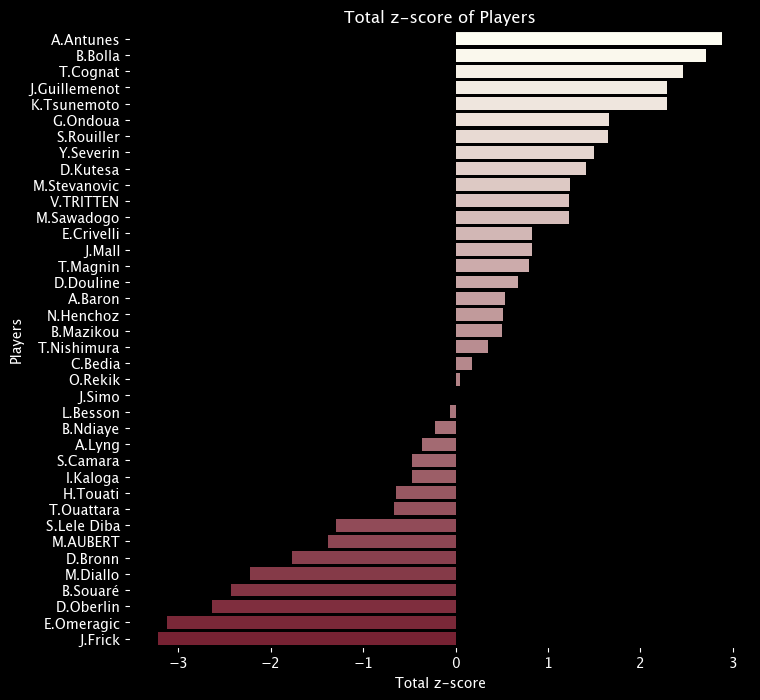

In [440]:


# Calcul du z-score total en ignorant les valeurs nulles
df['Total_z'] = df[['Max_speed_z', 'Accélération max_z', 'Distance_m/min_z', 'Attendance_z']].sum(axis=1, skipna=True)
# On trie les joueurs par leur z-score total en faisant un bar plot
df = df.sort_values('Total_z', ascending=False)

# la palette au couleur du club :))

start_color = '#85142B'
end_color = '#FFFFF0'

start_rgb = np.array(mcolors.hex2color(start_color))
end_rgb = np.array(mcolors.hex2color(end_color))


n_colors = len(df)
colors = [mcolors.to_hex(start_rgb + (end_rgb - start_rgb) * i / (n_colors - 1)) for i in range(n_colors)]


plt.figure(figsize=(8, 8))
sns.barplot(x='Total_z', y=df.index, data=df, palette=colors[::-1])
plt.xlabel('Total z-score', color='white')
plt.ylabel('Players', color='white')
plt.title('Total z-score of Players', color='white')
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

df.to_csv("data.csv")


In [441]:
# merge player id et name M19

match_played_M19 = pd.read_csv("/Users/cosaph/Desktop/fc servette/Coralie/Match_player/Servette Academy M19 - Match 23_24.csv")
all_training_M19 = pd.read_csv("/Users/cosaph/Desktop/fc servette/Coralie/Servette Academy M19 - Training 23_24.csv")

correspondance_M19 = pd.read_csv("/Users/cosaph/Desktop/fc servette/Coralie/corespondance/Servette Academy M19 - Correspondance.csv")

# merge player id et name M19

match_played_M19 = pd.merge(match_played_M19, correspondance_M19, on='PLAYER_ID')
all_training_M19 = pd.merge(all_training_M19, correspondance_M19, on='PLAYER_ID')



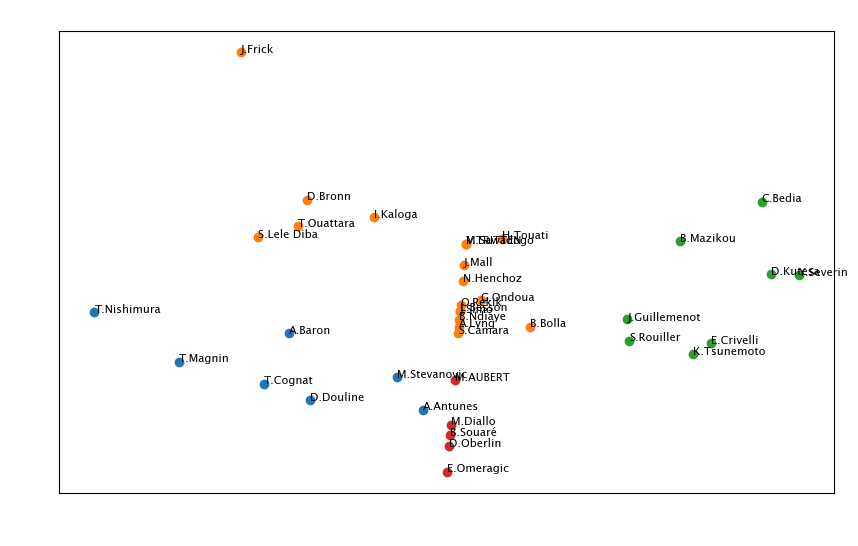

In [451]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['Max_speed', 'Accélération max', 'Distance_m/min', 'Attendance']
X = df[features].copy()
X.fillna(X.mean(), inplace=True) # Remplacer les valeurs manquantes par la moyenne
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#kmeans ++
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['Cluster'] = clusters

# Plot
plt.figure(figsize=(10, 6))

for cluster in range(8):
    plt.scatter(X_pca[df['Cluster'] == cluster][:, 0], X_pca[df['Cluster'] == cluster][:, 1], label=f'Cluster {cluster}')

# Affichage des noms des joueurs
for i, txt in enumerate(df['PLAYER_NAME']):
    plt.text(X_pca[i, 0], X_pca[i, 1], txt, fontsize=8, color='black')

plt.title('Clustering des données')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.legend()
plt.show()
